# Data Exploration to Answer Research Questions

This notebook provides code implementations to extract information from the collected set of records in order to address the research questions of the study.

## Load Data

In the following cells, the data file is loaded to process the records.

In [18]:
# necessary imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

In [19]:
data = pd.read_csv('../data/papers_reviewed_reprod_variables.csv')
data.drop('Paper ID', inplace=True, axis=1)

In [20]:
print(f'Number of primary studies: {len(data)}')

Number of primary studies: 66


In the following, the column names of the data file are renamed for consistency with the **variable identifiers** listed in Table 1 of the manuscript. 

In [4]:
questions_mapping = {
    '1a. Are all the data sources listed?': 'data_listed',
    '1b. What type of data is used?': 'data_type',
    '1c. Dataset statistics present?': 'data_stats',
    '1d. Data availability': 'data_access',
    '1f. Metadata/Description': 'data_metadata',

    '2a. pre porcessing steps': 'preproc_data',
    '2d. methods for features/descriptors': 'preproc_features',

    '3a. HP opt - model(s)': 'opt_mentioned',
    '3b. HP opt - baseline(s)': 'opt_baseline',
    '3c. HP opt procedure': 'opt_procedure',
    '3d. searched ranges - model': 'params_models',
    '3e. searched ranges - baselines': 'params_baselines',
    '3f. best HP - model': 'params_best_models',
    '3g. best HP - baselines': 'params_best_baselines',

    '4a. what splitting type': 'eval_splitting',
    '4e. metrics': 'eval_metrics',
    '4f. stat sig tests': 'eval_sig_test',

    '5a. code/workflow repo': 'code_link',
    '5b.  empty repo ': 'code_empty',
    '5c. data preprocessing code':'code_preproc',
    '5d. feature generation code':'code_feature_gen',
    '5e. evaluation code':'code_eval',
    '5f. hyperparameter tuning code': 'code_params_opt',
    '5g. supplementary info':'code_info',
    '5h. sw implementation':'code_runnable'
    }


In [5]:
data_graphs = data[questions_mapping.keys()]

In [6]:
data_graphs.rename(columns=questions_mapping, inplace=True)

## Categorization of Reproducibility Variables

The variables are assigned to the relevant categories listed in Table 1 of the manuscript.

In [7]:
dataset = ['data_listed', 'data_metadata', 'data_stats', 'data_type', 'data_access']
cleaning_preproc = ['preproc_data', 'preproc_features']
model_training_valid = ['opt_mentioned', 'opt_baseline', 'opt_procedure', 'params_models', 'params_baselines',
                       'params_best_models', 'params_best_baselines']
evaluation = ['eval_splitting', 'eval_metrics', 'eval_sig_test']
code_repo = ['code_link', 'code_empty', 'code_preproc', 'code_features_gen', 'code_eval',
                       'code_params_opt', 'code_info', 'code_runnable']

## Custom Function to Generate Graphs

In [8]:
def gen_graph_dataset_model_development(data, category, ax, title, subplot_label):
    binary_columns = [col for col in category if data[col].isin(['y', 'n']).all()]
    percentages = [(data[col] == 'y').mean() * 100 for col in binary_columns]
    bars = ax.bar(binary_columns, percentages, color='lightgrey', edgecolor='black')
    # show percentages
    for bar, percent in zip(bars, percentages):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{percent:.0f}%', 
                ha='center', va='bottom', fontsize=14, fontweight='bold')
    #title, labels, grid, and ticks
    ax.set_title(title, fontweight='bold', fontsize=16)
    #ax.set_ylabel('Percentage of Articles Documenting Each Variable', fontsize=13, fontweight='bold')
    #ax.set_xlabel('Variables', fontsize=, fontweight='bold')
    ax.set_ylim(0, 100)
    ax.set_yticks(range(0, 101, 10))
    ax.set_yticklabels([f'{i}%' for i in range(0, 101, 10)], fontsize=13)
    ax.tick_params(axis='x', rotation=90, labelsize=16)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    ax.text(0.5, -0.60, f'({subplot_label})', transform=ax.transAxes, 
            ha='center', va='top', fontsize=16, fontweight='bold')
    
    
def gen_graph_dataset_access_type(data, variables, titles, axarr):
    
    subplot_labels = ['a', 'b', 'c', 'd', 'e', 'f'] 
    for i, (ax, var, title) in enumerate(zip(axarr, variables, titles)):
        counts = data[var].value_counts().reindex(sorted(data[var].dropna().unique()), fill_value=0)
        bars = ax.bar(counts.index, counts.values, color='lightgrey', edgecolor='black')
        for bar, count in zip(bars, counts.values):
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, str(count),
                    ha='center', va='bottom', fontsize=14, fontweight='bold')
        ax.set_title(title, fontsize=16, fontweight='bold')
        if i == 0:
            ax.set_ylabel('Number of Articles', fontsize=14, fontweight='bold')
        else:
            ax.set_yticklabels([]) 
            ax.tick_params(axis='y', length=0)
        ax.set_ylim(0, 55)
        ax.set_yticks(range(0, 55, 5))
        ax.set_yticklabels([f'{i}' for i in range(0, 55, 5)], fontsize=13)
        ax.tick_params(axis='x', rotation=45, labelsize=14)
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        
        #subplot label at bottom center
        ax.text(0.5, -0.5, f'({subplot_labels[i]})', transform=ax.transAxes, 
                ha='center', va='top', fontsize=16, fontweight='bold')

def gen_graph_eval_splitting_type_distribution(data):

    fig, ax = plt.subplots(1, 1, figsize=(12, 6))    
    counts = data['eval_splitting'].value_counts()
    
    bars = ax.bar(range(len(counts)), counts.values, color='lightgrey', edgecolor='black')
    

    for bar, count in zip(bars, counts.values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, 
                str(count), ha='center', va='bottom', 
                fontsize=14, fontweight='bold')

    #ax.set_title('Distribution of Evaluation Splitting Types', fontweight='bold', fontsize=16)
    #ax.set_ylabel('Number of Articles', fontsize=14, fontweight='bold')
    ax.set_xlabel('Splitting Type', fontsize=14, fontweight='bold')
    
    ax.set_xticks(range(len(counts)))
    ax.set_xticklabels(counts.index, rotation=45, ha='right', fontsize=12)
    
    max_count = counts.max()
    ax.set_ylim(0, max_count * 1.1)
    ax.set_yticks(range(0, int(max_count * 1.1) + 1, max(1, int(max_count * 1.1) // 10)))
    ax.tick_params(axis='y', labelsize=12)
    
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    #ax.text(0.5, -0.2, f'({subplot_label})', transform=ax.transAxes, 
            #ha='center', va='top', fontsize=16, fontweight='bold')
    
    '''print(f"Total articles: {len(data)}")
    print(f"Articles with eval_splitting_type data: {data['eval_splitting'].notna().sum()}")
    print("\nDistribution:")
    for split_type, count in counts.items():
        percentage = (count / len(data)) * 100
        print(f"  {split_type}: {count} articles ({percentage:.1f}%)")'''
    
    #if show_plot:
    plt.tight_layout()
    #plt.savefig('eval_splitting.pdf', format='pdf', bbox_inches='tight')
    plt.show()


def gen_graph_metrics_frequency_plot(df, save_path=None):
    
    all_metrics = []
    
    for row in df['eval_metrics']:
        if pd.notna(row) and row.lower() != 'no metrics':
            metrics = [metric.strip() for metric in str(row).split(',')]
            all_metrics.extend(metrics)
    #print(all_metrics)
    metric_counts = Counter(all_metrics)
    
    #remove empty strings if any
    if '' in metric_counts:
        del metric_counts['']
    
    top_metrics = metric_counts.most_common(20)
    metrics = [item[0] for item in top_metrics]
    counts = [item[1] for item in top_metrics]
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    bars = ax.barh(range(len(metrics)), counts, color='lightblue', edgecolor='black', alpha=0.7)
    
    for i, (bar, count) in enumerate(zip(bars, counts)):
        ax.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
                str(count), ha='left', va='center', fontsize=8, fontweight='bold')
    ax.set_title('Frequency of Evaluation Metrics Usage', fontweight='bold', fontsize=12, pad=20)
    ax.set_xlabel('Frequency', fontsize=10, fontweight='bold')
    ax.set_ylabel('Evaluation Metrics', fontsize=10, fontweight='bold')

    ax.set_yticks(range(len(metrics)))
    ax.set_yticklabels(metrics, fontsize=11)
    
    #reverse order
    ax.invert_yaxis()
    
    ax.set_xlim(0, max(counts) * 1.1)

    ax.grid(axis='x', linestyle='--', alpha=0.3)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, format='pdf', bbox_inches='tight', dpi=300)
    
    plt.show()
    
    #summary statistics
    '''print(f"Total number of articles: {len(df)}")
    print(f"Articles with metrics: {len(df[df['4e. metrics'].str.lower() != 'no metrics'])}")
    print(f"Total unique metrics found: {len(metric_counts)}")
    print(f"Total metric mentions: {sum(metric_counts.values())}")
    print("\nTop 10 most frequent metrics:")
    for i, (metric, count) in enumerate(top_metrics[:10], 1):
        percentage = (count / len(df)) * 100
        print(f"{i:2d}. {metric}: {count} times ({percentage:.1f}% of articles)")'''



In the following cells, we analyze the reporting of dataset and model development information by visualizing the records as graphical representations.

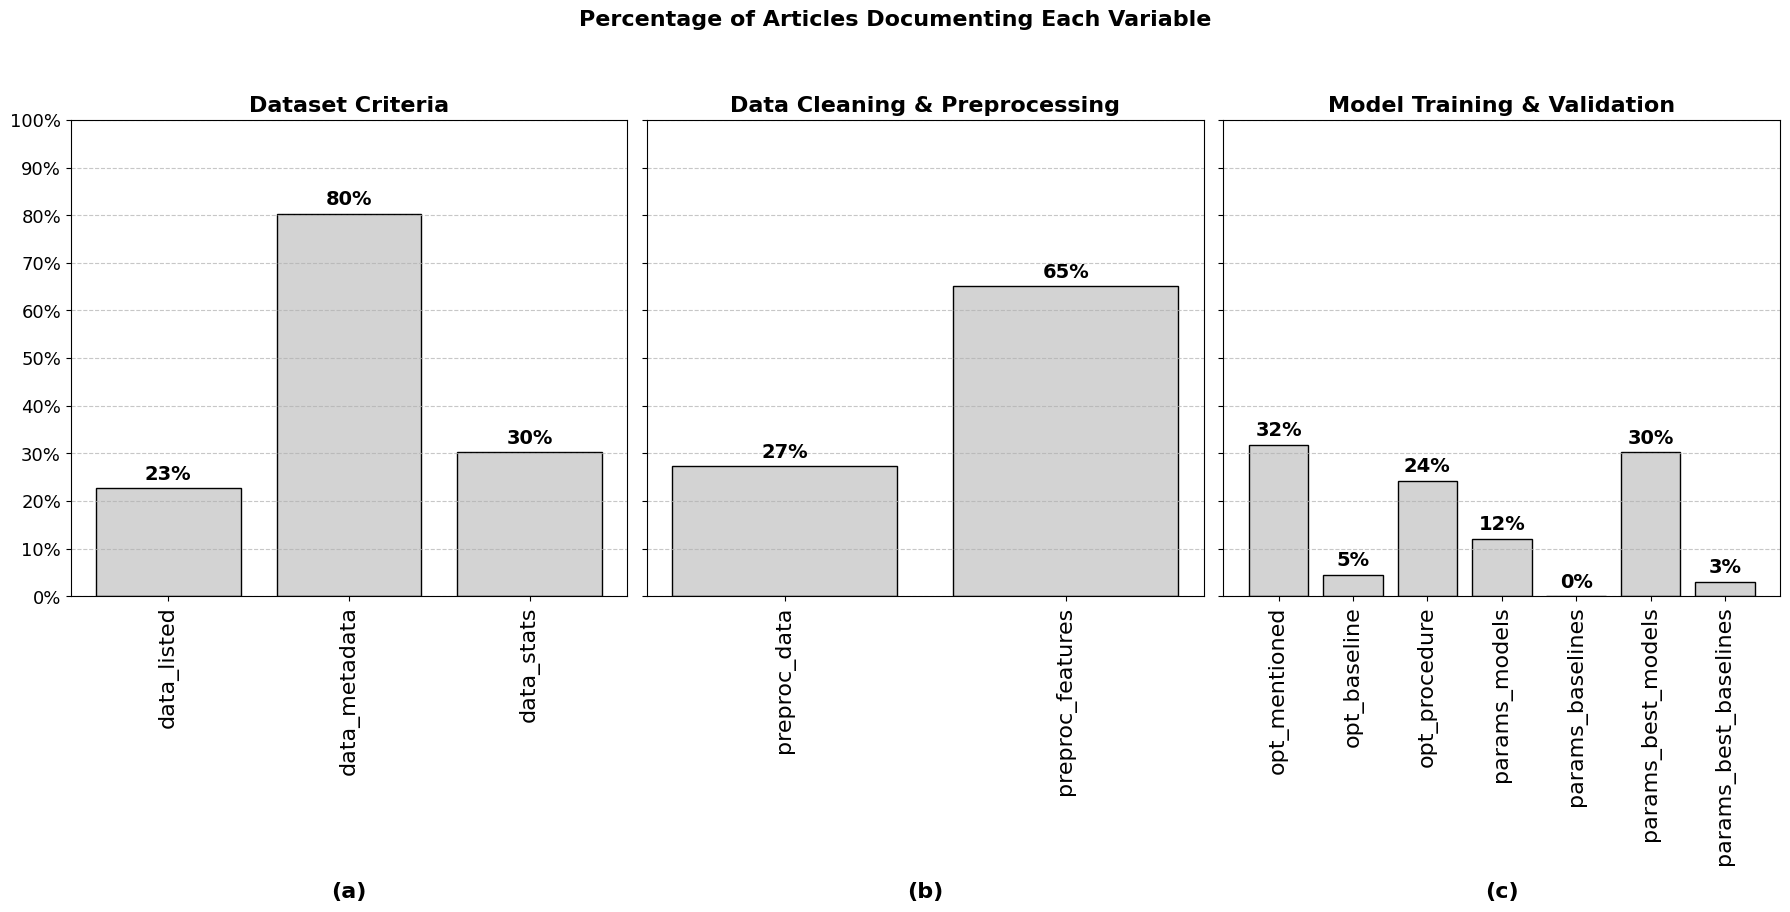

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(18, 12), sharey=True)
gen_graph_dataset_model_development(data_graphs, dataset, axs[0], 'Dataset Criteria', subplot_label='a')
gen_graph_dataset_model_development(data_graphs, cleaning_preproc, axs[1], 'Data Cleaning & Preprocessing', subplot_label='b')
gen_graph_dataset_model_development(data_graphs, model_training_valid, axs[2], 'Model Training & Validation', subplot_label='c')
fig.suptitle("Percentage of Articles Documenting Each Variable", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
#plt.savefig('rq1_results.pdf', format='pdf', bbox_inches='tight')
plt.show()

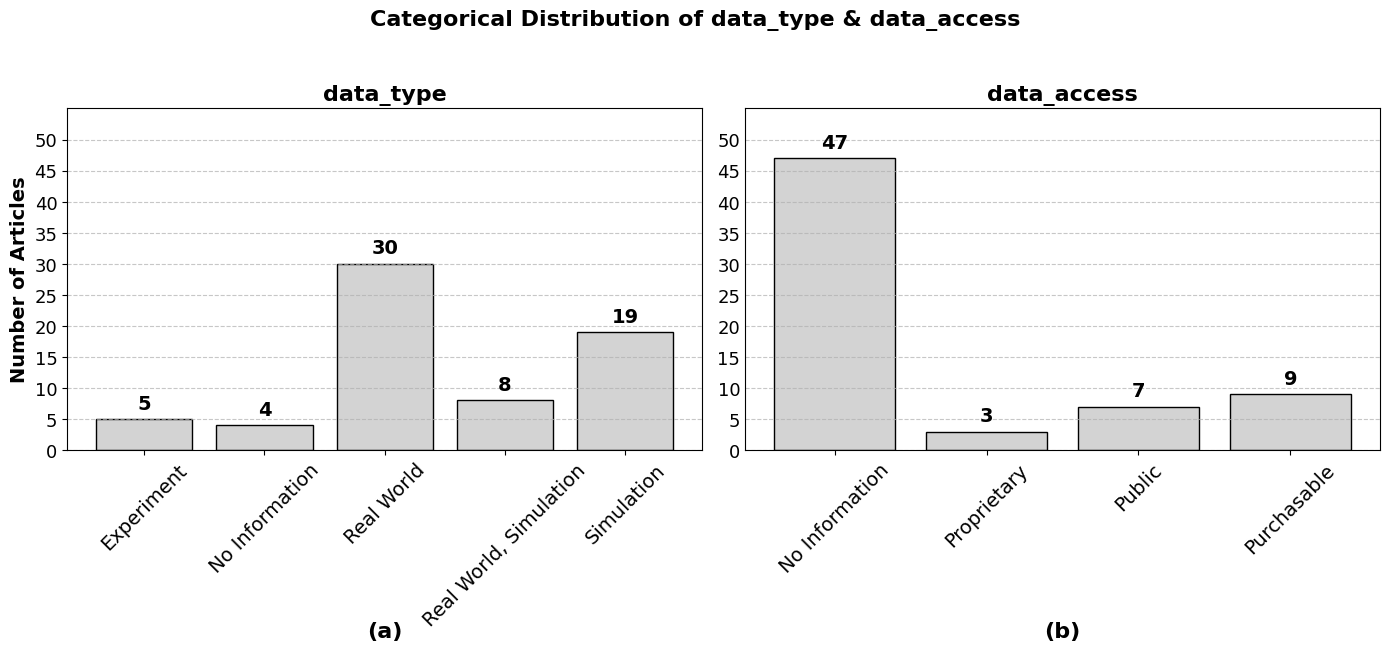

In [10]:
categories = ['data_type', 'data_access']
fig, axs = plt.subplots(1, 2, figsize=(14, 8))

gen_graph_dataset_access_type(data_graphs, categories, categories, axs)

fig.suptitle("Categorical Distribution of data_type & data_access", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
#plt.savefig('rq1_data_type_access_results.pdf', format='pdf', bbox_inches='tight')
plt.show()

The following code cell generates graph for data splitting schemes.

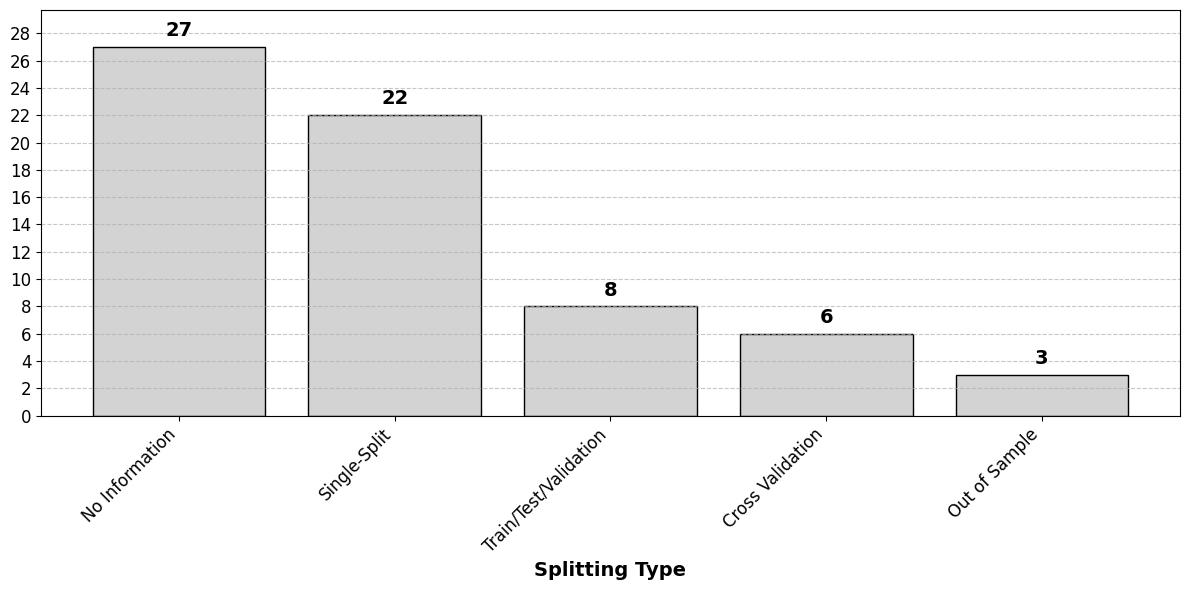

In [11]:
gen_graph_eval_splitting_type_distribution(data_graphs)

The following code cell generates a graph showing the distribution of metrics used to evaluate performance.

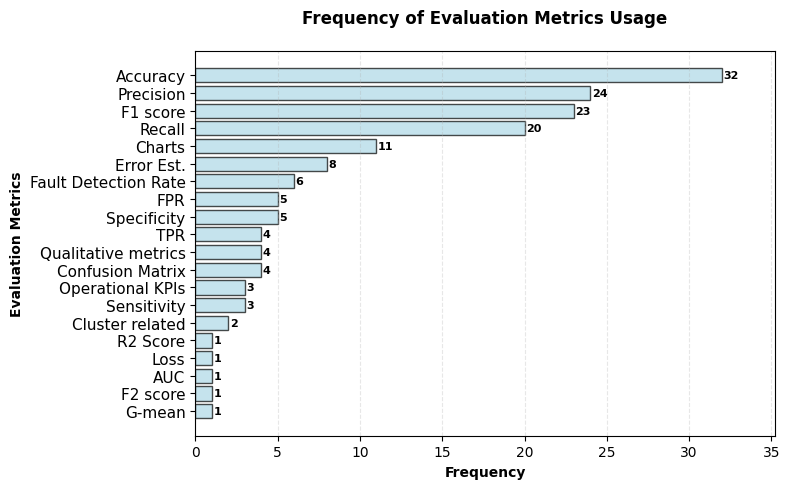

In [12]:
gen_graph_metrics_frequency_plot(data_graphs)

## Reproducibility Variables - Heatmap

In the following, the dataframe is first transformed into numerical matrix based on the values mapping defined below and a heatmap is generated to visually represent which parts of the reproducibility spectrum are “available” (blue) and which are “missing” (red).

In [13]:
def map_eval_metrics(value):
    if pd.isna(value):
        return 0
    else:
        return 1

In [14]:
numeric_mapping = {
    "y": 1,
    "n": 0,
    "na": 0,
    "No Information": 0,
    "Real World": 1,
    "Simulation": 1,
    "Experiment": 1,
    "Real World, Simulation": 1,
    "Proprietary": 1,
    "Public": 1, 
    "Purchasable": 1,
    "Single-Split": 1,
    "Train/Test/Validation": 1,
    "Cross Validation": 1,
    "Out of Sample": 1,
}

In [15]:
data_heatmap = data_graphs.replace(numeric_mapping)

In [16]:
data_heatmap['eval_metrics'] = data_heatmap["eval_metrics"].apply(map_eval_metrics)

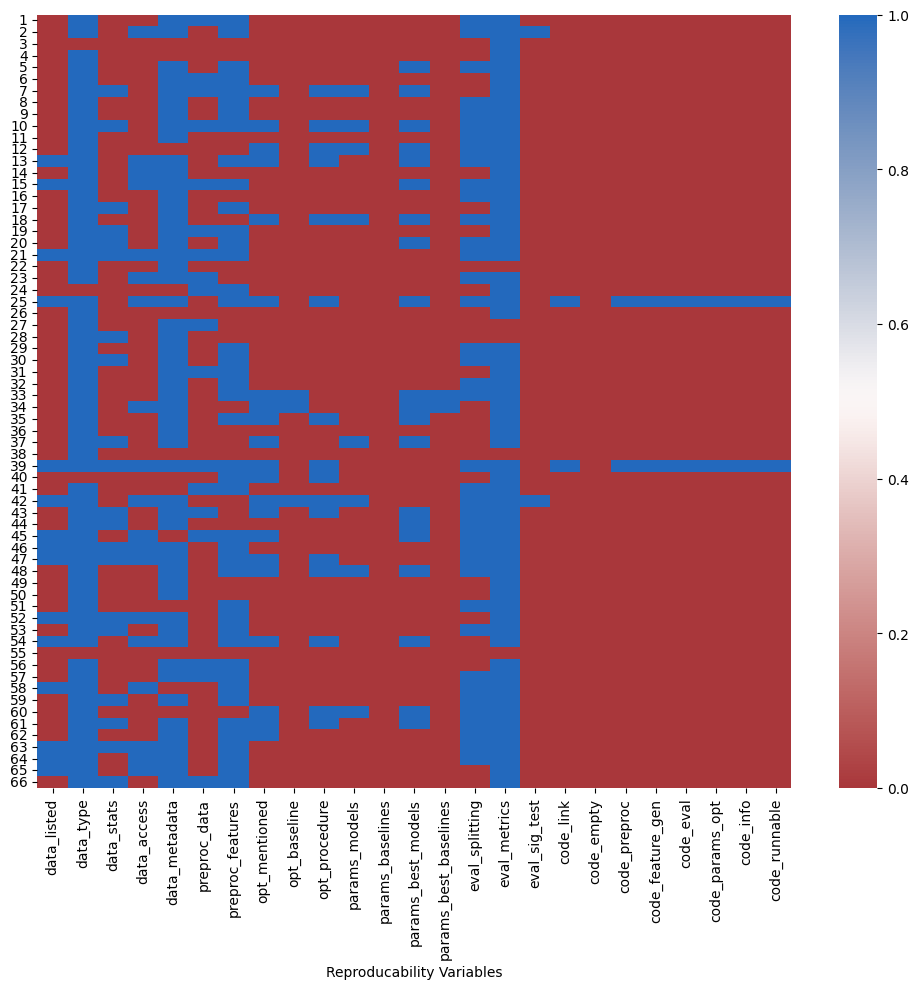

In [17]:
plt.figure(figsize=(10, 10))
sns.heatmap(data_heatmap, annot=False, vmin=0, vmax=1, center=0.5, cmap='vlag_r', xticklabels=data_heatmap.keys(), yticklabels=data_heatmap.index + 1)
plt.yticks(rotation=0)
plt.xlabel('Reproducability Variables')
plt.tight_layout()
#plt.savefig('figures/heatmap_variables.pdf')
plt.show()
